FIFA players, un modelo en busca de la mejor decision de mercado

Ramella Jose

18-1-2024

OBJETIVO: Realizar un modelo de prediccion que determine si existe una relacion entre el precio de mercado de los jugadores y sus caracteristicas deportivas.

CONTEXTO COMERCIAL: El mundo del futbol año a año ha generado cada vez mas y mas negocios a partir de futbolistas, dicho crecimiento trae aparejado una mayor competitividad y vuelve muy importante las tareas de captación y scouting de jugadores .En esta base de datos podremos ver 54 tipo de caracteristicas comparables entre 17953 jugadores.

PROBLEMA COMERCIAL: Al existir tantas ligas y por ende tantos jugadores, se crean fallas de mercado en las cuales se subvaluan y sobrevaluan distintos jugadores. Nuestra tarea sera descubrir aquellas fallas en las cuales se paga de mas y las oportunidades en las cuales el valor de mercado es menor en relacion a las skills del jugador.

AUDIENCIA: Clubes de Futbol, Ojeadores, Equipos de scouting, Socios e hinchas de clubes y representantes

In [1]:
#Librerias y data set
import pandas as pd
import numpy as np
file_path = "fifa_players.csv"
fifa_data = pd.read_csv(file_path)
fifa_data.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [2]:
# Curamos los datos
value_euro_median = fifa_data['value_euro'].median()
wage_euro_median = fifa_data['wage_euro'].median()

fifa_data['value_euro'].fillna(value_euro_median, inplace=True)
fifa_data['wage_euro'].fillna(wage_euro_median, inplace=True)

In [3]:
# Feature Engineering
fifa_data['age_to_potential_ratio'] = fifa_data['age'] / fifa_data['potential']
fifa_data['performance_index'] = (fifa_data['overall_rating'] + fifa_data['potential'] + fifa_data['composure']) / 3

# Establecemos esquema de ponderaciones
skills = ['dribbling', 'finishing', 'crossing', 'ball_control', 'long_shots', 'short_passing', 'volleys', 'curve', 'freekick_accuracy', 'long_passing']
fifa_data['weighted_skill_score'] = fifa_data[skills].mean(axis=1)

In [4]:
import plotly.graph_objects as go

# Aplicamos estadistica descriptiva
descriptive_stats = fifa_data.describe()

# Representamos graficamente
fig = go.Figure(data=[go.Table(
    header=dict(values=list(descriptive_stats.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[descriptive_stats[col].round(2) for col in descriptive_stats.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title='Descriptive Statistics for Numeric Columns', width=3000)
fig.show()

In [5]:
#Creamos una matriz de correlacion
import numpy as np
numeric_columns = fifa_data.select_dtypes(include=[np.number])
numeric_columns.fillna(method='bfill', inplace=True)
correlation_matrix = numeric_columns.corr()

In [15]:
import plotly.figure_factory as ff
import pandas as pd

# Supongamos que correlation_matrix es tu matriz de correlación
# correlation_matrix = pd.DataFrame(...)

# Creación del heatmap anotado
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.to_numpy(),
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.columns.tolist(),
    colorscale='Viridis',
    annotation_text=correlation_matrix.round(2).to_numpy(),
    showscale=True,
    font_colors=['white']
)

# Actualización del layout para mejorar la visualización
fig.update_layout(
    title='Correlation Matrix',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(
        side='bottom',
        tickangle=45  # Inclinar las etiquetas del eje x si es necesario
    ),
    yaxis=dict(
        autorange='reversed',
        automargin=True,  # Ajusta automáticamente los márgenes para el eje Y
        tickmode='array',
        tickvals=list(range(len(correlation_matrix.columns))),
        ticktext=correlation_matrix.columns.tolist()
    ),
    font=dict(size=12),
    margin=dict(l=200, r=50, t=100, b=200),  # Ajuste de márgenes para mayor espacio
    height=2000,  # Altura de la figura
    width=2000 # Ancho de la figura
)

# Mostrar el heatmap
fig.show()


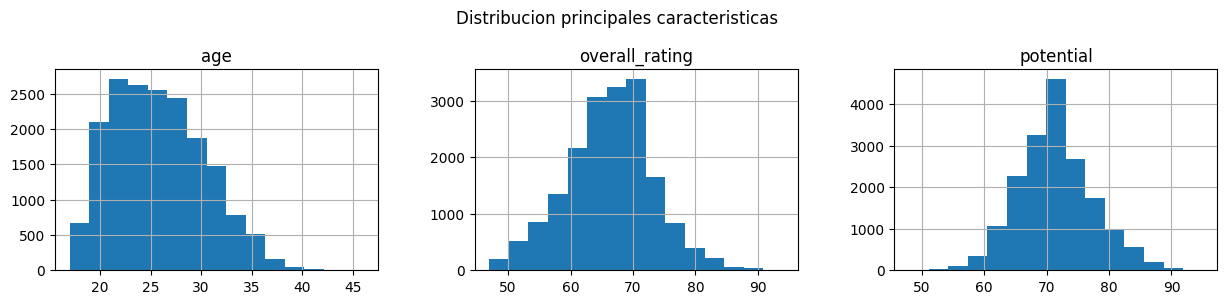

In [18]:
#Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas
key_features = ['age', 'overall_rating', 'potential',]
fifa_data[key_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle("Distribucion principales caracteristicas")
plt.show()

In [19]:
import plotly.express as px

fig_rating_value = px.scatter(fifa_data, x='overall_rating', y='value_euro', title='Overall Rating vs. Market Value', labels={'value_euro': 'Market Value (Euro)', 'overall_rating': 'Overall Rating'})
fig_rating_value.show()

In [20]:
fig_potential_wage = px.scatter(fifa_data, x='potential', y='wage_euro', title='Potential vs. Wage', labels={'wage_euro': 'Wage (Euro)', 'potential': 'Potential'})
fig_potential_wage.show()

In [21]:
# Suponemos que la columna 'position' contiene posiciones separadas por comas
# Extraemos el primero de la lista
fifa_data['primary_position'] = fifa_data['positions'].str.split(',').str[0]

#Creamos un Boxplot de distribucion salarial en terminos relativos a las posiciones principales
fig = px.box(fifa_data, x='primary_position', y='wage_euro', title='Wage Distribution by Primary Player Positions')
fig.update_traces(quartilemethod="exclusive")  # or "inclusive", as per your preference
fig.update_layout(xaxis_title='Primary Position', yaxis_title='Wage (Euro)', xaxis={'categoryorder':'total descending'})
fig.show()

In [22]:
#Creamos grupos etarios
fifa_data['age_group'] = pd.cut(fifa_data['age'], bins=[0, 20, 25, 30, 35, 40, 100], labels=['<20', '21-25', '26-30', '31-35', '36-40', '>40'])

#Creamos una boxplot que los represente en relación a los salarios

fig_age_group = px.box(fifa_data, x='age_group', y='value_euro', title='Market Value Distribution by Age Groups')
fig_age_group.update_layout(xaxis_title='Age Group', yaxis_title='Market Value (Euro)')
fig_age_group.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Definimos Feautures y Targets
features = ['age', 'overall_rating', 'potential', 'international_reputation(1-5)', 'weak_foot(1-5)',
            'skill_moves(1-5)', 'age_to_potential_ratio', 'performance_index', 'weighted_skill_score']
targets = ['value_euro', 'wage_euro']

# Definimos X e Y, separamos X e Y test y X e Y train
X = fifa_data[features]
y = fifa_data[targets]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos modelo, entrenamos y evaluamos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Entrenamos y evaluamos
def train_evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for target in y_train.columns:
        results[target] = {}
        for name, model in models.items():
            # Training the model on one target at a time
            model.fit(X_train, y_train[target])

            # Predicting on the test set
            y_pred = model.predict(X_test)

            # Evaluating the model
            rmse = mean_squared_error(y_test[target], y_pred, squared=False)  # Calculate RMSE
            r2 = r2_score(y_test[target], y_pred)  # Calculate R²

            # Storing results
            results[target][name] = {'RMSE': rmse, 'R²': r2}

    return results
# Evaluamos
model_results = train_evaluate_models(models, X_train, X_test, y_train, y_test)

# Resultados
for target in model_results:
    print(f"Results for {target}:")
    for model_name, metrics in model_results[target].items():
        print(f"  {model_name}: RMSE - {metrics['RMSE']}, R² - {metrics['R²']}")
    print()


Results for value_euro:
  Linear Regression: RMSE - 3663232.331749525, R² - 0.6401428334553734
  Random Forest: RMSE - 997430.0752674529, R² - 0.9733212088453771
  Gradient Boosting: RMSE - 875618.3119182044, R² - 0.9794396312380907
  Support Vector Regression: RMSE - 6371458.70226824, R² - -0.08862668008338948

Results for wage_euro:
  Linear Regression: RMSE - 16068.49430104296, R² - 0.5526840146459081
  Random Forest: RMSE - 11292.600812952149, R² - 0.7790713671893703
  Gradient Boosting: RMSE - 11403.35307997188, R² - 0.7747165982413676
  Support Vector Regression: RMSE - 24857.91691506205, R² - -0.07051687215840596



Los modelos con menor RMSE son el Random Forest y el Gradient Boosting, lo que implica que seran estos los que arrojen datos mas precisos en sus predicciones ya que se ajustan mejor a los datos proporcionados.

In [24]:
# Ponderaciones de caracteristicas en el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train['value_euro'])  # Example for 'value_euro' target

# Ponderamos
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Ponderamos
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficamos peso de las caracteristicas sobre valor de mercado
import plotly.express as px
fig_importance = px.bar(importance_df, x='Importance', y='Feature', title='Feature Importances for Market Value Prediction')
fig_importance.show()


In [41]:
# Función para entrenar y evaluar modelos con validación cruzada solo para Random Forest
def train_evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
# Entrenamiento y evaluación estándar para todos los modelos
    for target in y_train.columns:
        results[target] = {}
        for name, model in models.items():
            if name == "Random Forest":
                # Aplicar validación cruzada para Random Forest
                scoring = make_scorer(mean_squared_error, squared=False)
                scores = cross_val_score(model, X_train, y_train[target], scoring=scoring, cv=5)
                rmse_mean = scores.mean()
                rmse_std = scores.std()
                results[target][name] = {'CV RMSE Mean': rmse_mean, 'CV RMSE Std': rmse_std}
            else:
               if name == "Gradient Boosting":
                 # Aplicar validación cruzada para Gradient Boosting
                scoring = make_scorer(mean_squared_error, squared=False)
                scores = cross_val_score(model, X_train, y_train[target], scoring=scoring, cv=5)
                rmse_mean = scores.mean()
                rmse_std = scores.std()
                results[target][name] = {'CV RMSE Mean': rmse_mean, 'CV RMSE Std': rmse_std}

    return results
# Evaluamos
model_results = train_evaluate_models(models, X_train, X_test, y_train, y_test)

# Mostramos resultados
for target in model_results:
    print(f"Results for {target}:")
    for model_name, metrics in model_results[target].items():
        if 'CV RMSE Mean' in metrics:
            print(f"  {model_name}: CV RMSE Mean - {metrics['CV RMSE Mean']}, CV RMSE Std - {metrics['CV RMSE Std']}")
        else:
            print(f"  {model_name}: RMSE - {metrics['RMSE']}, R² - {metrics['R²']}")
    print()

Results for value_euro:
  Random Forest: CV RMSE Mean - 810513.369787675, CV RMSE Std - 166474.059452936
  Gradient Boosting: CV RMSE Mean - 740037.0604283216, CV RMSE Std - 121733.53135032262

Results for wage_euro:
  Random Forest: CV RMSE Mean - 10620.498250889019, CV RMSE Std - 560.3561370528395
  Gradient Boosting: CV RMSE Mean - 10140.567230905719, CV RMSE Std - 624.6712308213454



In [ ]:
#Optimizacion random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

rf = RandomForestRegressor(random_state=42)

# Definimos la cuadrícula de hiperparámetros a explorar
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Definimos la métrica de evaluación - RMSE
scoring = make_scorer(mean_squared_error, squared=False)

#GridSearchCV para RandomForestRegressor
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring=scoring,
                              n_jobs=-1)

# Ajusta Grid Search en los datos de entrenamiento
grid_search_rf.fit(X_train, y_train['value_euro'])

# Muestra los mejores parámetros y el mejor score
print("Best Parameters for Random Forest:")
print(grid_search_rf.best_params_)
print("Best RMSE Score:", grid_search_rf.best_score_)

# Obtiene el mejor modelo con los mejores parámetros
best_rf_model = grid_search_rf.best_estimator_